<a href="https://colab.research.google.com/github/Renator12/Restaurant-Datascience/blob/main/RESTAURANTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json

In [2]:
key='indian'

In [3]:
def getapikey():
  key=input('Enter your api key')
  return f'{key}'

In [4]:
api_key=getapikey()
headers = {'Authorization': 'Bearer %s' % api_key}

Enter your api key9R3FRJDz3AkJyVwL5-oC6p6DwJXVhCaFbuj92Kci4XRTp0px5ukHi3AlsvuYvhuwMxKfyKM1C37S0y5uzDnDjvmuPHLh1Oq9SHWQ_BVM8sgWklQAUq3is9Ol688QY3Yx


In [5]:
location='Brampton canada'

In [6]:
url='https://api.yelp.com/v3/businesses/search'
 
# In the dictionary, term can take values like food, cafes or businesses like McDonalds
params = {'term':key,'location':location,'limit':35}
req=requests.get(url, params=params, headers=headers)

In [7]:
import pandas as pd
import numpy as np


In [8]:
print(req)

<Response [200]>


In [9]:


 
# proceed only if the status code is 200
a=req.json()

for keys in a['businesses']:
    if 'price' in keys:
      df=pd.DataFrame(columns=['name','longtitude','latitude','rating','price','distance(meters)','title','imageurl'])
      print(keys['name'], keys['price'],keys['coordinates'])
      
      id=keys['id']
      coordinates=keys['coordinates']
    else:
      print(keys['id'])
      



Baba Dhaba $$ {'latitude': 43.688259697643446, 'longitude': -79.72877474662228}
Mirch Masala $$ {'latitude': 43.7002, 'longitude': -79.74227}
OYoDV0dpWa6GAnEYQUfbdg
jB6fhx7yOl8LVLj_OIg2xA
Paranthe Wali Gali $$ {'latitude': 43.68841, 'longitude': -79.7417399}
Punjabi Dhaba $ {'latitude': 43.7022896, 'longitude': -79.6446686}
Incredible India $$ {'latitude': 43.75597, 'longitude': -79.7591}
Guru Lukshmi $$ {'latitude': 43.6393317020495, 'longitude': -79.7159669611217}
Sweet Palace Restaurant $ {'latitude': 43.7575956710937, 'longitude': -79.7370477803991}
I8eIW6cCITvEl73jCv8Qvw
Chat Hut $ {'latitude': 43.70568, 'longitude': -79.64566}
King Tandoori $$ {'latitude': 43.6861584236917, 'longitude': -79.7378064589996}
Kwality Sweets & Restaurant $$ {'latitude': 43.7134039, 'longitude': -79.6818281}
Avani Asian Indian Bistro $$ {'latitude': 43.60632743859953, 'longitude': -79.69189471166078}
Samosa and Sweet Factory $ {'latitude': 43.7465, 'longitude': -79.61537}
Tandoori Flame $$ {'latitude':

In [10]:
for x in a['businesses']:
  print(x['image_url'])

https://s3-media1.fl.yelpcdn.com/bphoto/ihmyp7ivjnsezkJ-8qnruw/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/eePySC5dKE1sBIkCKIEOhQ/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/IqrSSM63h6IorsLQCohQ0w/o.jpg
https://s3-media4.fl.yelpcdn.com/bphoto/NfoiLPqnlhwuvfG7sQt8PQ/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/zGaF67BPxr0Rv1hmEd10ZQ/o.jpg
https://s3-media3.fl.yelpcdn.com/bphoto/UKINUxMUkGo0l0IjPUXhgA/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/o9pLQad-2W8QwKjIeEOPbg/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/cl8stNhAxaXp8uiXyrXSZg/o.jpg
https://s3-media3.fl.yelpcdn.com/bphoto/Ek-EiWO2Ar9bjJLjTL0WzQ/o.jpg
https://s3-media1.fl.yelpcdn.com/bphoto/LJpNDuDxO7ZhHFhJjsTmZg/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/3PaJnqSu-J7EN6SQtziWqg/o.jpg
https://s3-media3.fl.yelpcdn.com/bphoto/JnnyxaCU2StAXhWo-loPPQ/o.jpg
https://s3-media2.fl.yelpcdn.com/bphoto/lKdE_uaDro0POlctrmV-rg/o.jpg
https://s3-media4.fl.yelpcdn.com/bphoto/4eiPi_AvODWL2NfcdUQw-g/o.jpg
https://s3-media3.fl.yelpcdn.com/b

In [11]:
listkeys=list(a['businesses'][0].keys())
listkeys

['id',
 'alias',
 'name',
 'image_url',
 'is_closed',
 'url',
 'review_count',
 'categories',
 'rating',
 'coordinates',
 'transactions',
 'price',
 'location',
 'phone',
 'display_phone',
 'distance']

In [12]:
df=pd.DataFrame(columns=listkeys)
for x in a['businesses']:
  df=df.append(x,ignore_index=True)
df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,QEqMHowTTj5GKvpiKheGlQ,baba-dhaba-brampton,Baba Dhaba,https://s3-media1.fl.yelpcdn.com/bphoto/ihmyp7...,False,https://www.yelp.com/biz/baba-dhaba-brampton?a...,55,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.688259697643446, 'longitude': ...",[],$$,"{'address1': '255 Rutherford Road S', 'address...",+19054994314,+1 905-499-4314,1935.922700
1,MVLQkoWx-uHFVyOBBFfvyQ,mirch-masala-brampton-2,Mirch Masala,https://s3-media2.fl.yelpcdn.com/bphoto/eePySC...,False,https://www.yelp.com/biz/mirch-masala-brampton...,53,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.7002, 'longitude': -79.74227}",[],$$,"{'address1': '263 Queen Street E', 'address2':...",+19052167322,+1 905-216-7322,217.640008
2,OYoDV0dpWa6GAnEYQUfbdg,amritsari-dhaba-brampton,Amritsari Dhaba,https://s3-media2.fl.yelpcdn.com/bphoto/IqrSSM...,False,https://www.yelp.com/biz/amritsari-dhaba-bramp...,6,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 43.681342, 'longitude': -79.729513}",[],NaN,"{'address1': '168 Kennedy Road S', 'address2':...",+19054542888,+1 905-454-2888,2544.762159
3,jB6fhx7yOl8LVLj_OIg2xA,streetbitez-brampton,Streetbitez,https://s3-media4.fl.yelpcdn.com/bphoto/NfoiLP...,False,https://www.yelp.com/biz/streetbitez-brampton?...,6,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.5,"{'latitude': 43.68169, 'longitude': -79.7286388}",[],NaN,"{'address1': '168 Kennedy Road S', 'address2':...",+19054570663,+1 905-457-0663,2544.543015
4,v9VCOZbkQJxdw4-iY1ZXZQ,paranthe-wali-gali-brampton,Paranthe Wali Gali,https://s3-media2.fl.yelpcdn.com/bphoto/zGaF67...,False,https://www.yelp.com/biz/paranthe-wali-gali-br...,54,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.68841, 'longitude': -79.7417399}",[],$$,"{'address1': '143 Clarence St', 'address2': 'U...",+13657885678,+1 365-788-5678,1465.805868
5,4ritTGFnNxmKnKm-UX3kPQ,punjabi-dhaba-mississauga,Punjabi Dhaba,https://s3-media3.fl.yelpcdn.com/bphoto/UKINUx...,False,https://www.yelp.com/biz/punjabi-dhaba-mississ...,58,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",4.0,"{'latitude': 43.7022896, 'longitude': -79.6446...",[],$,"{'address1': '2855 Derry Road E', 'address2': ...",+19059563442,+1 905-956-3442,8001.741199
6,-JDAieYuZocQSVYGqwWKog,incredible-india-brampton,Incredible India,https://s3-media2.fl.yelpcdn.com/bphoto/o9pLQa...,False,https://www.yelp.com/biz/incredible-india-bram...,30,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 43.75597, 'longitude': -79.7591}",[],$$,"{'address1': '10635 Bramalea Road', 'address2'...",+19057897701,+1 905-789-7701,6167.455490
7,LI9sVHgnX-DzFyvWmPDRgA,guru-lukshmi-mississauga-4,Guru Lukshmi,https://s3-media2.fl.yelpcdn.com/bphoto/cl8stN...,False,https://www.yelp.com/biz/guru-lukshmi-mississa...,527,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.6393317020495, 'longitude': -7...",[restaurant_reservation],$$,"{'address1': '7070 St Barbara Boulevard', 'add...",+19057952299,+1 905-795-2299,7287.353003
8,1A47OcRyjJa56OwrTZpfmA,sweet-palace-restaurant-brampton-2,Sweet Palace Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/Ek-EiW...,False,https://www.yelp.com/biz/sweet-palace-restaura...,69,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.7575956710937, 'longitude': -7...",[],$,"{'address1': '1098 Peter Robertson Boulevard',...",+19057901777,+1 905-790-1777,6254.391826
9,I8eIW6cCITvEl73jCv8Qvw,rasovara-mississauga,Rasovara,https://s3-media1.fl.yelpcdn.com/bphoto/LJpNDu...,False,https://www.yelp.com/biz/rasovara-mississauga?...,12,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 43.58018, 'longitude': -79.6138}",[],NaN,"{'address1': '2560 Shepard Avenue', 'address2'...",+19052323373,+1 905-232-3373,17104.695391


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35 non-null     object 
 1   alias          35 non-null     object 
 2   name           35 non-null     object 
 3   image_url      35 non-null     object 
 4   is_closed      35 non-null     object 
 5   url            35 non-null     object 
 6   review_count   35 non-null     object 
 7   categories     35 non-null     object 
 8   rating         35 non-null     float64
 9   coordinates    35 non-null     object 
 10  transactions   35 non-null     object 
 11  price          28 non-null     object 
 12  location       35 non-null     object 
 13  phone          35 non-null     object 
 14  display_phone  35 non-null     object 
 15  distance       35 non-null     float64
dtypes: float64(2), object(14)
memory usage: 4.5+ KB


In [14]:
df=df[df['categories'].astype(bool)]

df

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,QEqMHowTTj5GKvpiKheGlQ,baba-dhaba-brampton,Baba Dhaba,https://s3-media1.fl.yelpcdn.com/bphoto/ihmyp7...,False,https://www.yelp.com/biz/baba-dhaba-brampton?a...,55,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.688259697643446, 'longitude': ...",[],$$,"{'address1': '255 Rutherford Road S', 'address...",+19054994314,+1 905-499-4314,1935.922700
1,MVLQkoWx-uHFVyOBBFfvyQ,mirch-masala-brampton-2,Mirch Masala,https://s3-media2.fl.yelpcdn.com/bphoto/eePySC...,False,https://www.yelp.com/biz/mirch-masala-brampton...,53,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.7002, 'longitude': -79.74227}",[],$$,"{'address1': '263 Queen Street E', 'address2':...",+19052167322,+1 905-216-7322,217.640008
2,OYoDV0dpWa6GAnEYQUfbdg,amritsari-dhaba-brampton,Amritsari Dhaba,https://s3-media2.fl.yelpcdn.com/bphoto/IqrSSM...,False,https://www.yelp.com/biz/amritsari-dhaba-bramp...,6,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 43.681342, 'longitude': -79.729513}",[],NaN,"{'address1': '168 Kennedy Road S', 'address2':...",+19054542888,+1 905-454-2888,2544.762159
3,jB6fhx7yOl8LVLj_OIg2xA,streetbitez-brampton,Streetbitez,https://s3-media4.fl.yelpcdn.com/bphoto/NfoiLP...,False,https://www.yelp.com/biz/streetbitez-brampton?...,6,"[{'alias': 'indpak', 'title': 'Indian'}, {'ali...",4.5,"{'latitude': 43.68169, 'longitude': -79.7286388}",[],NaN,"{'address1': '168 Kennedy Road S', 'address2':...",+19054570663,+1 905-457-0663,2544.543015
4,v9VCOZbkQJxdw4-iY1ZXZQ,paranthe-wali-gali-brampton,Paranthe Wali Gali,https://s3-media2.fl.yelpcdn.com/bphoto/zGaF67...,False,https://www.yelp.com/biz/paranthe-wali-gali-br...,54,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.68841, 'longitude': -79.7417399}",[],$$,"{'address1': '143 Clarence St', 'address2': 'U...",+13657885678,+1 365-788-5678,1465.805868
5,4ritTGFnNxmKnKm-UX3kPQ,punjabi-dhaba-mississauga,Punjabi Dhaba,https://s3-media3.fl.yelpcdn.com/bphoto/UKINUx...,False,https://www.yelp.com/biz/punjabi-dhaba-mississ...,58,"[{'alias': 'foodtrucks', 'title': 'Food Trucks...",4.0,"{'latitude': 43.7022896, 'longitude': -79.6446...",[],$,"{'address1': '2855 Derry Road E', 'address2': ...",+19059563442,+1 905-956-3442,8001.741199
6,-JDAieYuZocQSVYGqwWKog,incredible-india-brampton,Incredible India,https://s3-media2.fl.yelpcdn.com/bphoto/o9pLQa...,False,https://www.yelp.com/biz/incredible-india-bram...,30,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 43.75597, 'longitude': -79.7591}",[],$$,"{'address1': '10635 Bramalea Road', 'address2'...",+19057897701,+1 905-789-7701,6167.455490
7,LI9sVHgnX-DzFyvWmPDRgA,guru-lukshmi-mississauga-4,Guru Lukshmi,https://s3-media2.fl.yelpcdn.com/bphoto/cl8stN...,False,https://www.yelp.com/biz/guru-lukshmi-mississa...,527,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.6393317020495, 'longitude': -7...",[restaurant_reservation],$$,"{'address1': '7070 St Barbara Boulevard', 'add...",+19057952299,+1 905-795-2299,7287.353003
8,1A47OcRyjJa56OwrTZpfmA,sweet-palace-restaurant-brampton-2,Sweet Palace Restaurant,https://s3-media3.fl.yelpcdn.com/bphoto/Ek-EiW...,False,https://www.yelp.com/biz/sweet-palace-restaura...,69,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,"{'latitude': 43.7575956710937, 'longitude': -7...",[],$,"{'address1': '1098 Peter Robertson Boulevard',...",+19057901777,+1 905-790-1777,6254.391826
9,I8eIW6cCITvEl73jCv8Qvw,rasovara-mississauga,Rasovara,https://s3-media1.fl.yelpcdn.com/bphoto/LJpNDu...,False,https://www.yelp.com/biz/rasovara-mississauga?...,12,"[{'alias': 'indpak', 'title': 'Indian'}]",4.5,"{'latitude': 43.58018, 'longitude': -79.6138}",[],NaN,"{'address1': '2560 Shepard Avenue', 'address2'...",+19052323373,+1 905-232-3373,17104.695391


In [15]:
df.drop(columns='transactions',inplace=True)

In [16]:
df['title']=df['categories'].apply(lambda x:x[0]['title'])
df['title']


0          Indian
1          Indian
2          Indian
3          Indian
4          Indian
5     Food Trucks
6          Indian
7          Indian
8          Indian
9          Indian
10         Indian
11         Indian
12         Indian
13         Indian
14         Indian
15         Indian
16         Indian
17         Indian
18         Indian
19         Indian
20         Indian
21        Buffets
22         Indian
23         Indian
24         Indian
25         Indian
26         Indian
27         Indian
28         Indian
29         Indian
30         Indian
31         Indian
32         Indian
33         Indian
34         Indian
Name: title, dtype: object

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             35 non-null     object 
 1   alias          35 non-null     object 
 2   name           35 non-null     object 
 3   image_url      35 non-null     object 
 4   is_closed      35 non-null     object 
 5   url            35 non-null     object 
 6   review_count   35 non-null     object 
 7   categories     35 non-null     object 
 8   rating         35 non-null     float64
 9   coordinates    35 non-null     object 
 10  price          28 non-null     object 
 11  location       35 non-null     object 
 12  phone          35 non-null     object 
 13  display_phone  35 non-null     object 
 14  distance       35 non-null     float64
 15  title          35 non-null     object 
dtypes: float64(2), object(14)
memory usage: 4.6+ KB


In [18]:
df.isna().sum()

id               0
alias            0
name             0
image_url        0
is_closed        0
url              0
review_count     0
categories       0
rating           0
coordinates      0
price            7
location         0
phone            0
display_phone    0
distance         0
title            0
dtype: int64

In [19]:
df=df.fillna(0)
df['price']


0      $$
1      $$
2       0
3       0
4      $$
5       $
6      $$
7      $$
8       $
9       0
10      $
11     $$
12     $$
13     $$
14      $
15     $$
16     $$
17      0
18     $$
19    $$$
20      $
21     $$
22     $$
23      0
24     $$
25     $$
26    $$$
27     $$
28     $$
29     $$
30    $$$
31     $$
32      0
33      $
34      0
Name: price, dtype: object

In [20]:
df['coordinates']
df['longitude']=df['coordinates'].apply(lambda x:x['longitude'])
df['latitude']=df['coordinates'].apply(lambda x:x['latitude'])
df.drop(columns='coordinates',inplace=True)

In [21]:
df.isna().sum()

id               0
alias            0
name             0
image_url        0
is_closed        0
url              0
review_count     0
categories       0
rating           0
price            0
location         0
phone            0
display_phone    0
distance         0
title            0
longitude        0
latitude         0
dtype: int64

In [22]:
dfnew=df.drop(columns=['id','alias','name','image_url','review_count','categories','location','phone','display_phone','longitude','latitude','is_closed','url'])
dfnew

,rating,price,distance,title
0,4.0,$$,1935.922700,Indian
1,4.0,$$,217.640008,Indian
2,4.5,0,2544.762159,Indian
3,4.5,0,2544.543015,Indian
4,4.0,$$,1465.805868,Indian
5,4.0,$,8001.741199,Food Trucks
6,4.5,$$,6167.455490,Indian
7,4.0,$$,7287.353003,Indian
8,4.0,$,6254.391826,Indian
9,4.5,0,17104.695391,Indian


In [23]:
dfnew['title'].value_counts()

Indian         33
Food Trucks     1
Buffets         1
Name: title, dtype: int64

In [24]:
dfnew

,rating,price,distance,title
0,4.0,$$,1935.922700,Indian
1,4.0,$$,217.640008,Indian
2,4.5,0,2544.762159,Indian
3,4.5,0,2544.543015,Indian
4,4.0,$$,1465.805868,Indian
5,4.0,$,8001.741199,Food Trucks
6,4.5,$$,6167.455490,Indian
7,4.0,$$,7287.353003,Indian
8,4.0,$,6254.391826,Indian
9,4.5,0,17104.695391,Indian


In [25]:
dfnew=pd.get_dummies(data=dfnew,columns=['title'])


In [26]:

dfnew['distance']=(dfnew['distance']-dfnew['distance'].mean())/dfnew['distance'].std()

dfnew

,rating,price,distance,title_Buffets,title_Food Trucks,title_Indian
0,4.0,$$,-1.154047,0,0,1
1,4.0,$$,-1.507819,0,0,1
2,4.5,0,-1.028695,0,0,1
3,4.5,0,-1.028740,0,0,1
4,4.0,$$,-1.250838,0,0,1
5,4.0,$,0.094825,0,1,0
6,4.5,$$,-0.282830,0,0,1
7,4.0,$$,-0.052258,0,0,1
8,4.0,$,-0.264931,0,0,1
9,4.5,0,1.969003,0,0,1


In [27]:
dfnew.values

array([[4.0, '$$', -1.1540468985965089, 0, 0, 1],
       [4.0, '$$', -1.5078186274277485, 0, 0, 1],
       [4.5, 0, -1.0286948893923475, 0, 0, 1],
       [4.5, 0, -1.0287400082166378, 0, 0, 1],
       [4.0, '$$', -1.250837749810882, 0, 0, 1],
       [4.0, '$', 0.09482507490949786, 0, 1, 0],
       [4.5, '$$', -0.28283014409638074, 0, 0, 1],
       [4.0, '$$', -0.052258026351055364, 0, 0, 1],
       [4.0, '$', -0.26493109992934405, 0, 0, 1],
       [4.5, 0, 1.9690032042240873, 0, 0, 1],
       [4.5, '$', 0.08380746505922551, 0, 0, 1],
       [3.5, '$$', -1.1835194589840952, 0, 0, 1],
       [3.5, '$$', -0.48457681201847735, 0, 0, 1],
       [4.0, '$$', 0.7944555610661945, 0, 0, 1],
       [4.0, '$', 0.809353486467848, 0, 0, 1],
       [3.5, '$$', -1.011999659861242, 0, 0, 1],
       [4.0, '$$', 0.9623493149393706, 0, 0, 1],
       [4.5, 0, 1.4458033178340581, 0, 0, 1],
       [3.0, '$$', -0.6858285071809473, 0, 0, 1],
       [2.5, '$$$', -0.2735965806695199, 0, 0, 1],
       [4.5, '$', 

In [28]:
pricedict={0:0,'$':1,'$$':2,'$$$':3,'$$$$':4,'$$$$$':5}
dfnew['price']=dfnew['price'].apply(lambda x:pricedict[x])



In [29]:
df['price']=df['price'].apply(lambda x:pricedict[x])

In [30]:
dfnew

,rating,price,distance,title_Buffets,title_Food Trucks,title_Indian
0,4.0,2,-1.154047,0,0,1
1,4.0,2,-1.507819,0,0,1
2,4.5,0,-1.028695,0,0,1
3,4.5,0,-1.028740,0,0,1
4,4.0,2,-1.250838,0,0,1
5,4.0,1,0.094825,0,1,0
6,4.5,2,-0.282830,0,0,1
7,4.0,2,-0.052258,0,0,1
8,4.0,1,-0.264931,0,0,1
9,4.5,0,1.969003,0,0,1


In [31]:

url=f'https://api.yelp.com/v3/businesses/{id}/reviews'
req=requests.get(url, headers=headers)
for vals in req.json()['reviews']:
  print(vals['text'])


I've been to this place a few times Ofer the summer and more recently too! It reminds me of the places I used to go with my parents when I was younger, but...
This has been my go to place whenever I am in the area until recently when we took out our food and the next day, we all had stomach flu.  Not sure whether...
The place was super busy on the weekend we went well after the lunch hour. The place is fairly clean. The staff not knowledgeable about what goes in their...


In [32]:
print(coordinates['latitude'])


43.70609


In [33]:
import plotly.express as px

marker = dict(size = 8,opacity = 0.8, reversescale = True,autocolorscale = False,symbol = 'square', line = dict(width=1,color='rgba(102, 102, 102)'  ))
fig = px.scatter_geo(df,lat='latitude',lon='longitude', hover_name="price",color='name',size='rating')
fig.update_layout(title = 'restaurants with price ratings(scale 1-5)', title_x=0.5)
fig.show()

Text(0, 0.5, 'silhouette')

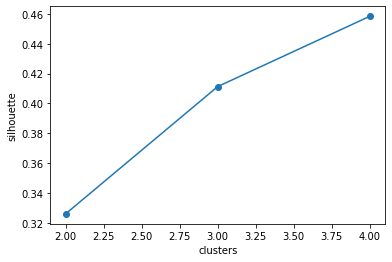

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
scores=[]
for n in range(2,min(5,dfnew.shape[0])):
  km=KMeans(n_clusters=n)
  km.fit_predict(dfnew.values)
  scores.append(silhouette_score(dfnew.values,km.labels_))
plt.plot([n for n in range(2,min(5,dfnew.shape[0]))],scores,marker='o')
plt.xlabel("clusters")
plt.ylabel("silhouette")

In [35]:
clusternum=np.argmax(scores)+2
km=KMeans(n_clusters=clusternum)
km.fit_predict(dfnew)
labels=km.labels_
df['labels']=labels
clusternum

4

In [36]:
show=df.sort_values(['distance'])
chosen=show.head(5)
chosen


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,price,location,phone,display_phone,distance,title,longitude,latitude,labels
1,MVLQkoWx-uHFVyOBBFfvyQ,mirch-masala-brampton-2,Mirch Masala,https://s3-media2.fl.yelpcdn.com/bphoto/eePySC...,False,https://www.yelp.com/biz/mirch-masala-brampton...,53,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,2,"{'address1': '263 Queen Street E', 'address2':...",+19052167322,+1 905-216-7322,217.640008,Indian,-79.742270,43.700200,1
4,v9VCOZbkQJxdw4-iY1ZXZQ,paranthe-wali-gali-brampton,Paranthe Wali Gali,https://s3-media2.fl.yelpcdn.com/bphoto/zGaF67...,False,https://www.yelp.com/biz/paranthe-wali-gali-br...,54,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,2,"{'address1': '143 Clarence St', 'address2': 'U...",+13657885678,+1 365-788-5678,1465.805868,Indian,-79.741740,43.688410,1
29,HF-fLG3QaNepY151QKDNLA,king-tandoori-brampton,King Tandoori,https://s3-media2.fl.yelpcdn.com/bphoto/n0YIg4...,False,https://www.yelp.com/biz/king-tandoori-brampto...,31,"[{'alias': 'indpak', 'title': 'Indian'}]",3.5,2,"{'address1': '270 Rutherford Road', 'address2'...",+19054632000,+1 905-463-2000,1789.025957,Indian,-79.737882,43.686177,1
11,8NRrrHLOWgEq4NUAcv55Cw,king-tandoori-brampton-2,King Tandoori,https://s3-media3.fl.yelpcdn.com/bphoto/Jnnyxa...,False,https://www.yelp.com/biz/king-tandoori-brampto...,31,"[{'alias': 'indpak', 'title': 'Indian'}]",3.5,2,"{'address1': '107 Kennedy Road S', 'address2':...",+19054593939,+1 905-459-3939,1792.773358,Indian,-79.737806,43.686158,1
0,QEqMHowTTj5GKvpiKheGlQ,baba-dhaba-brampton,Baba Dhaba,https://s3-media1.fl.yelpcdn.com/bphoto/ihmyp7...,False,https://www.yelp.com/biz/baba-dhaba-brampton?a...,55,"[{'alias': 'indpak', 'title': 'Indian'}]",4.0,2,"{'address1': '255 Rutherford Road S', 'address...",+19054994314,+1 905-499-4314,1935.922700,Indian,-79.728775,43.688260,1


In [37]:
chosennames=list(chosen['name'])
chosennames

['Mirch Masala',
 'Paranthe Wali Gali',
 'King Tandoori',
 'King Tandoori',
 'Baba Dhaba']

In [38]:
vals=list(chosen['image_url']) 
vals

['https://s3-media2.fl.yelpcdn.com/bphoto/eePySC5dKE1sBIkCKIEOhQ/o.jpg',
 'https://s3-media2.fl.yelpcdn.com/bphoto/zGaF67BPxr0Rv1hmEd10ZQ/o.jpg',
 'https://s3-media2.fl.yelpcdn.com/bphoto/n0YIg4xfY9GstfERQua5VQ/o.jpg',
 'https://s3-media3.fl.yelpcdn.com/bphoto/JnnyxaCU2StAXhWo-loPPQ/o.jpg',
 'https://s3-media1.fl.yelpcdn.com/bphoto/ihmyp7ivjnsezkJ-8qnruw/o.jpg']

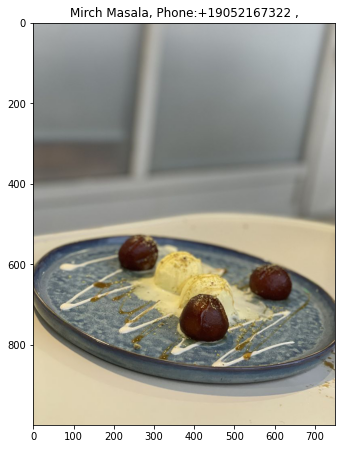

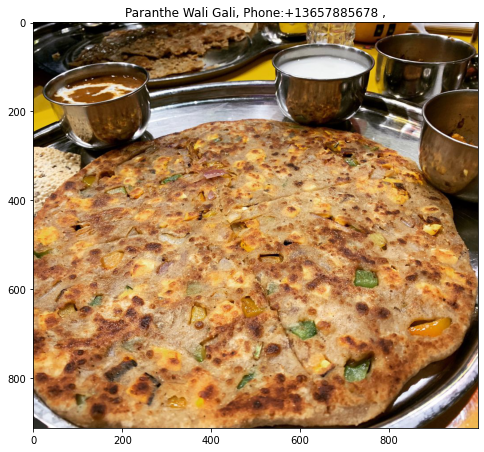

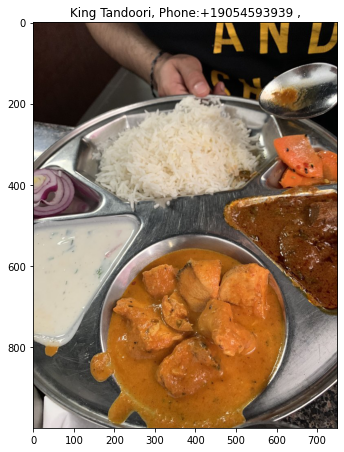

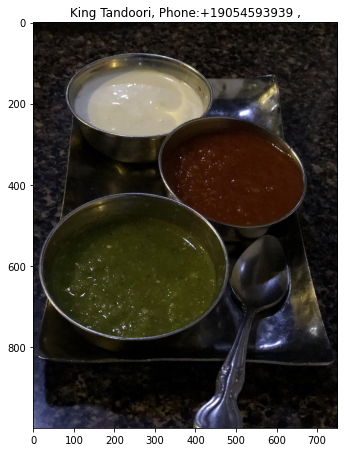

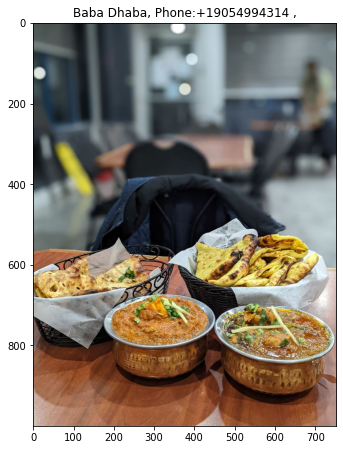

In [39]:
import PIL
import urllib.request
import io


def show(vals,details=False):

  for i,url1 in enumerate(vals):
    if url1 !='':
      plt.figure(figsize=(30,30))
      response = requests.get(url1)
      image_bytes = io.BytesIO(response.content)

      img = PIL.Image.open(image_bytes)
      plt.subplot(5,1,i+1)    # the number of images in the grid is 5*5 (25)
      plt.imshow(img)
      
        
      plt.title(f'{chosennames[i]}, Phone:{df[df["name"]==chosennames[i]]["phone"].values[0]} ,')
      plt.tight_layout()

  plt.show()
show(vals)

In [ ]:
name=input("enter the restaurant you like")
g=df[df['name']==name]['labels']
labelthis=g.iloc[0]
new=df[df['labels']==labelthis].sort_values(by=['rating'],ascending=False)
top3=new.head(3)
vals2=list(top3['image_url'])
show(vals2,details=True)
